# Ensemble Techniques Assignment

## Problem Statement

### Problem statement (Term Deposit Sale)

We have data from a Portuguese bank on details of customers related to selling a term deposit. The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio.


### What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

 

### Resources Available

The historical data for this project is available in file https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

 

### Deliverable –1 (Exploratory data analysis)–(15)

#### Univariate analysis (9marks)
Data types and description of the independent attributes which should include (name,  range of values observed, central values (mean and median), standard deviation and quartiles, skewness). - 3 Marks

Make a function to plot ‘countplot’ if the variable is categorical and ‘distplot’ if the variable is numeric. - 3 Marks

Identify outliers using IQR and verify the same using plots. Also mention the percentage of data points which are considered outliers. Should we treat them, why or why not? - 3 Marks
#### Multivariate analysis (6marks)
Make a function to plot boxplots for all continuous variables VS ‘Target’ variable and countplots for all categorical variables VS ‘Target’ variable? - 3 Marks

Bi-variate analysis between predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmaps, histograms or density curves. - 3 Marks
 

### Deliverable –2 (Prepare the data for analytics)–(5)

Label encode or create dummy variables for categorical variables. Give reason for selecting either of them. - 2 Marks

Create the training set and test set in a ratio of 70:30. Make sure and verify distribution of classes is the same in the full dataset and train test split data. - 3 Marks
 

### Deliverable –3 (Create the ensemble model)–(30)

Build the ensemble models (Bagging and Boosting) and Decision Tree model (at least 4 models in total). Note the model performance by using different metrics. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. - 10 Marks

Also reflect the training and testing score of all the models. Build a dataframe with model names as row index and all the metrics calculated as columns - 5 Marks

Explain the confusion matrix related terms like recall, precision etc. Also, select the best metric to choose one of the models from above. Give your reason for the same. - 5 Marks

Answer the following questions : - 10 Marks

What do you mean by recall and what information does it provide here?
Suggest some changes for the organization so that they can increase the number of customers who take term deposit.
How much influence does the previous campaign and mode of interaction have on financial performance.
Which features should be more/less focused by the bank to get better results and why?
What did you learn about banking industries from this data?
 

Note : Use random_state=7 (wherever the parameter can be used) so that we can compare all submissions.

Provide comments in the solution notebook regarding the steps you take and also provide insights drawn from the plots. - 5 Marks.

#### Marks distribution for Students with recall_score (pos_label = ‘yes’) on the test set:

Above 43% - 5 Marks

Between 40% to 43% - 4 Marks

Less than 40% - 3 Marks

Note : Make sure you are not overfitting the model in order to increase the recall score only.

 

### Attribute Information


1 - age 
2 - job : type of job 
3 - marital : marital status
4 - education 
5 - default: has credit in default? 
6 - housing: has housing loan? 
7 - loan: has personal loan?
8 - balance in account
9 - contact: contact communication type
10 - month: last contact month of year
11 - day: last contact day of the month
12 - duration: last contact duration, in seconds
13 - campaign: number of contacts performed during this campaign and for this client
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign
15 - previous: number of contacts performed before this campaign and for this client
16 - poutcome: outcome of the previous marketing campaign

17 - Output variable ('Target'): has the client subscribed a term deposit?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
edata=pd.read_csv('bank_e.csv')

In [3]:
edata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Univariate Analysis

In [4]:
edata.shape

(45211, 17)

In [5]:
edata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
edata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
edata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Make a function to plot ‘countplot’ if the variable is categorical and ‘distplot’ if the variable is numeric

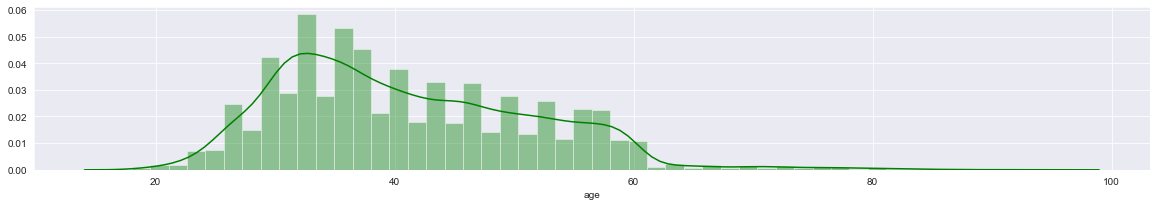

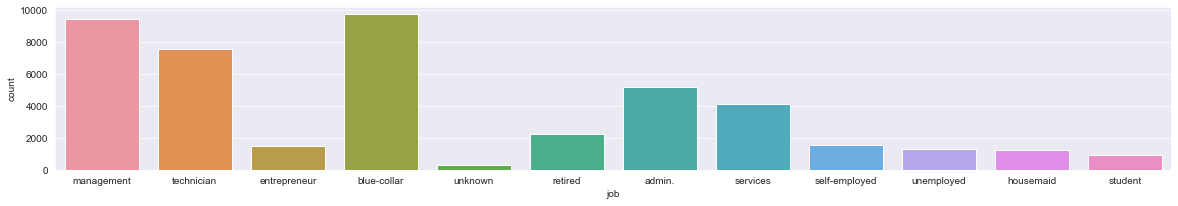

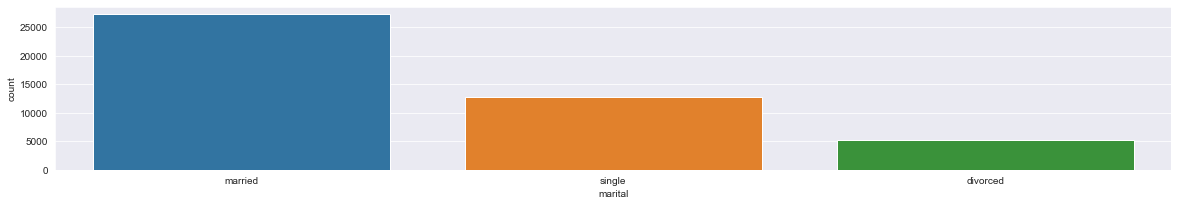

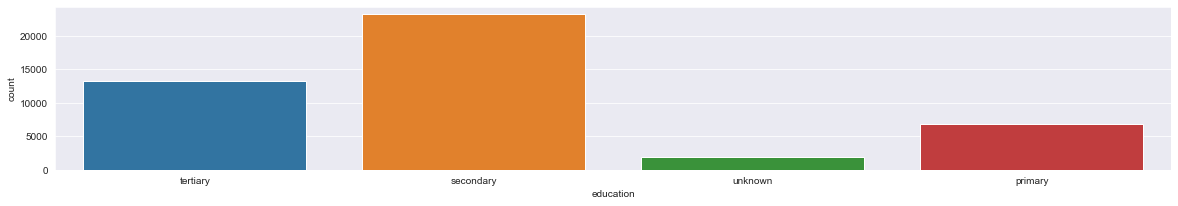

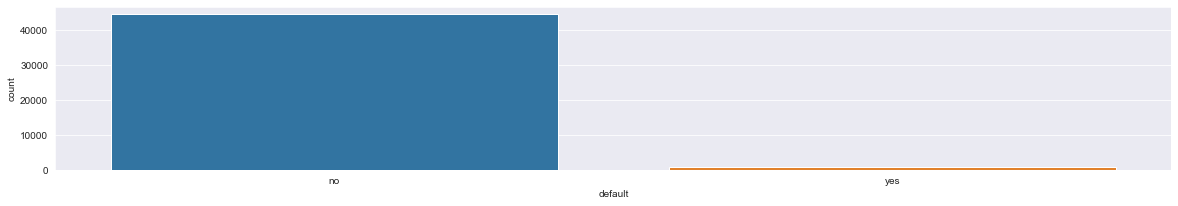

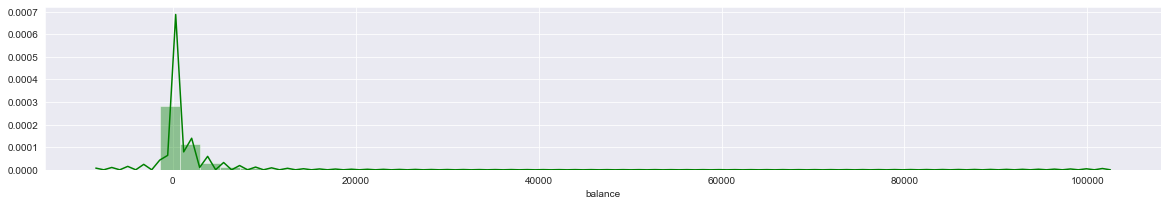

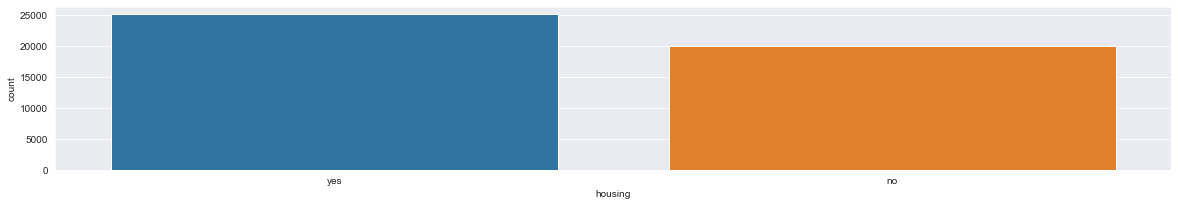

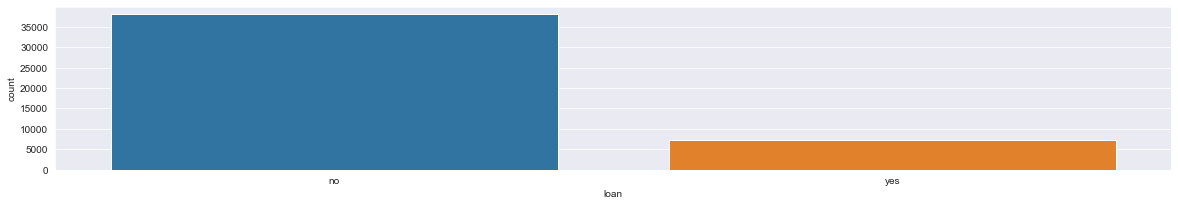

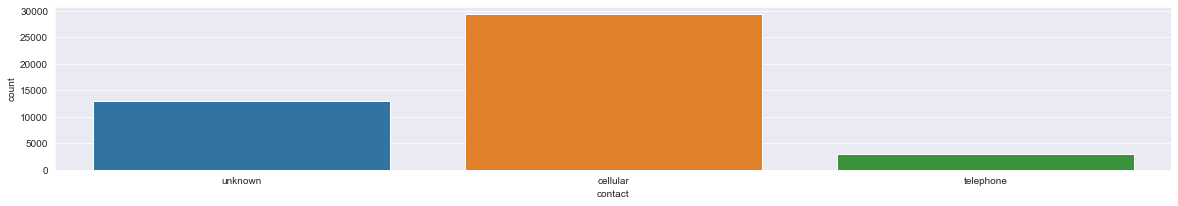

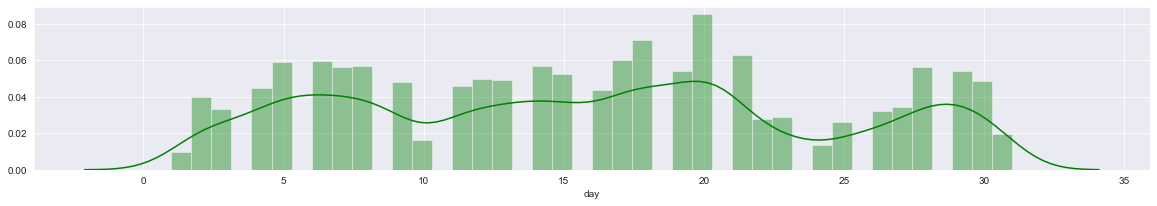

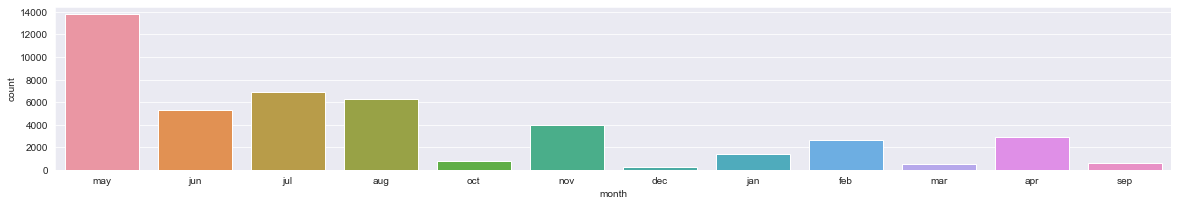

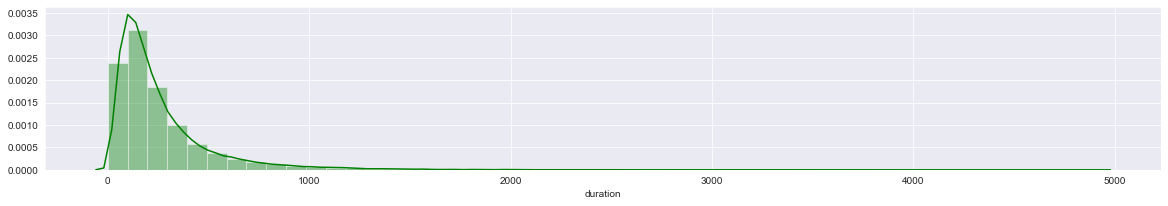

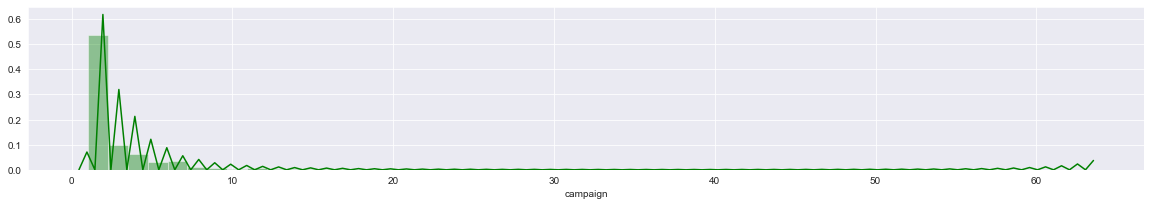

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


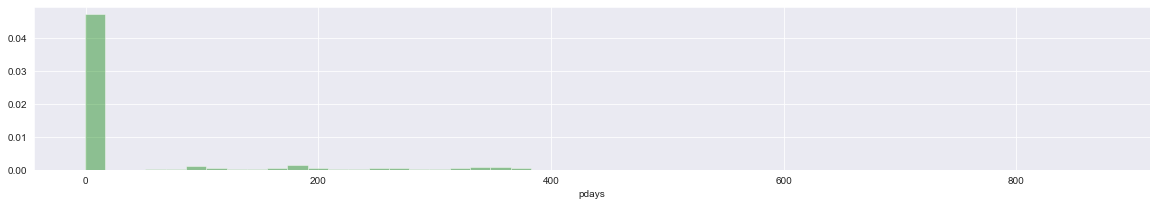

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


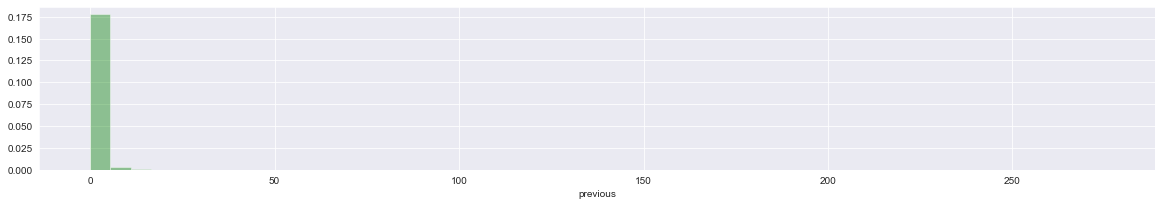

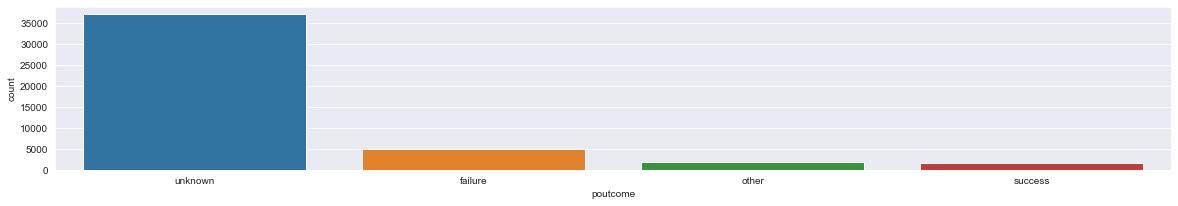

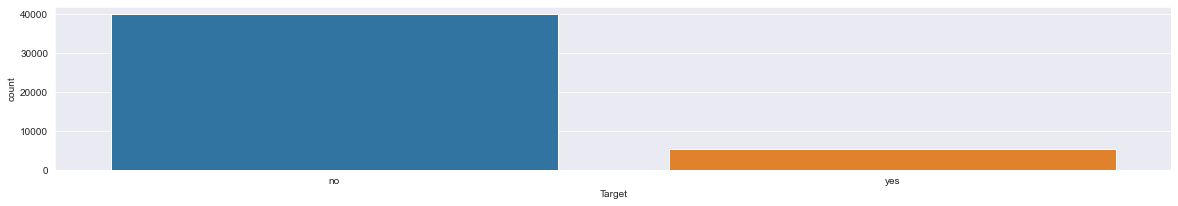

In [8]:
def count_dist_plot(objDF):

    for i in objDF.columns:
        if objDF[i].dtype == 'object':
            fig,ax = plt.subplots(figsize=(20, 3))
            sns.countplot(objDF[i])
        elif objDF[i].dtype == 'int64':
            fig,ax = plt.subplots(figsize=(20, 3))
            sns.distplot(objDF[i], color="g")
            plt.show()
        
count_dist_plot(edata);

### Identify outliers using IQR and verify the same using plots. Also mention the percentage of data points which are considered outliers. Should we treat them, why or why not?

In [9]:
#Percentage of outliers in each of the numeric columns
# IQR

for i in edata.columns:
    if edata[i].dtype == 'int64':
        q1 = edata[i].quantile(.25)
        q3 = edata[i].quantile(.75)
        IQR = q3-q1
        IQR1=IQR*1.5
        lowerlimit = q1-IQR1
        upperlimit = q3+IQR1
        a=edata[(edata[i]<lowerlimit)|(edata[i]>upperlimit)]
        percentage = round((a.shape[0]/edata.shape[0])*100,2)
        
        print("Column",i,"has",a.shape[0],"outliers", "which Constitute to",(percentage),"% of the total value")    

Column age has 487 outliers which Constitute to 1.08 % of the total value
Column balance has 4729 outliers which Constitute to 10.46 % of the total value
Column day has 0 outliers which Constitute to 0.0 % of the total value
Column duration has 3235 outliers which Constitute to 7.16 % of the total value
Column campaign has 3064 outliers which Constitute to 6.78 % of the total value
Column pdays has 8257 outliers which Constitute to 18.26 % of the total value
Column previous has 8257 outliers which Constitute to 18.26 % of the total value


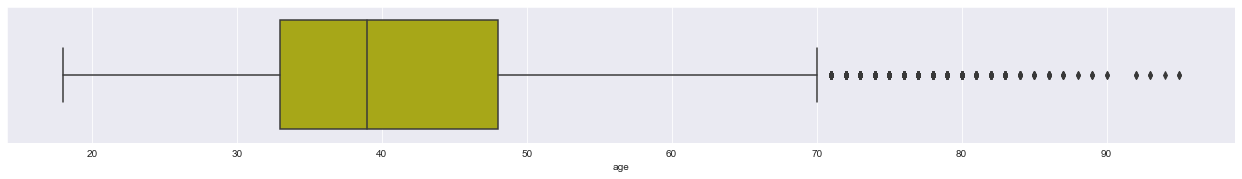

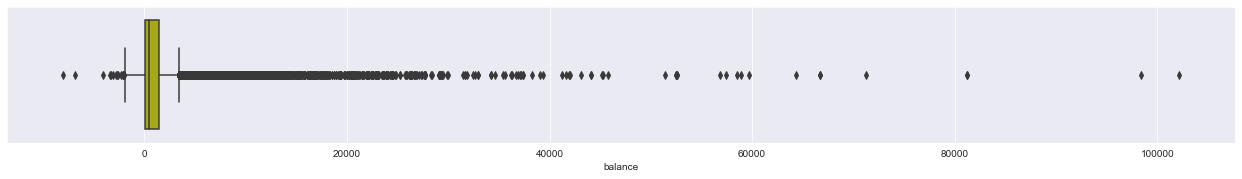

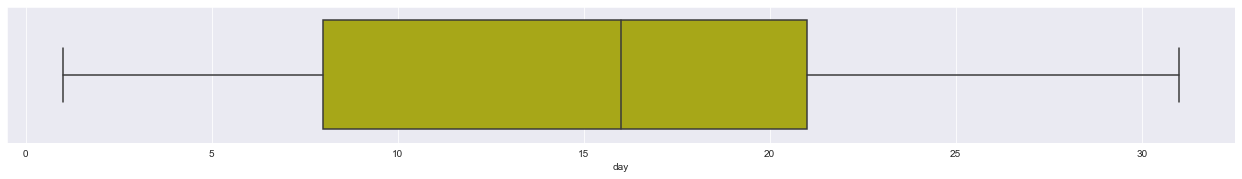

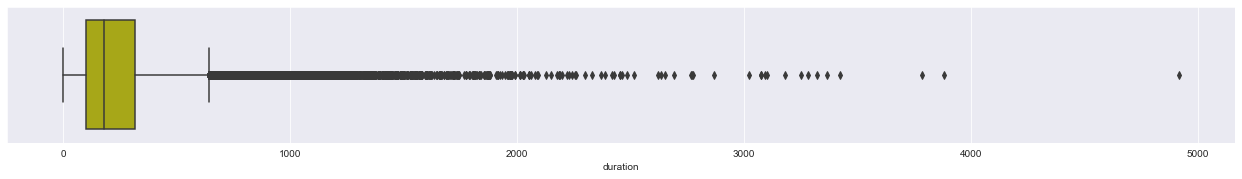

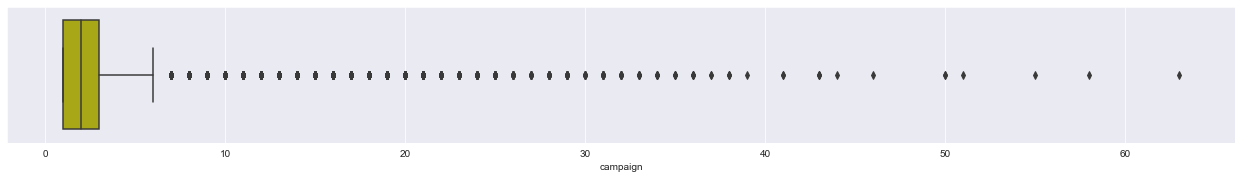

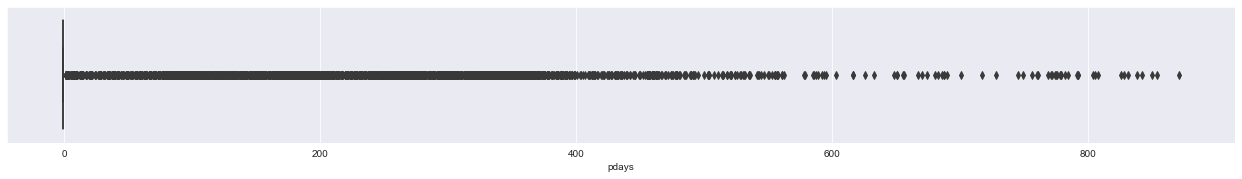

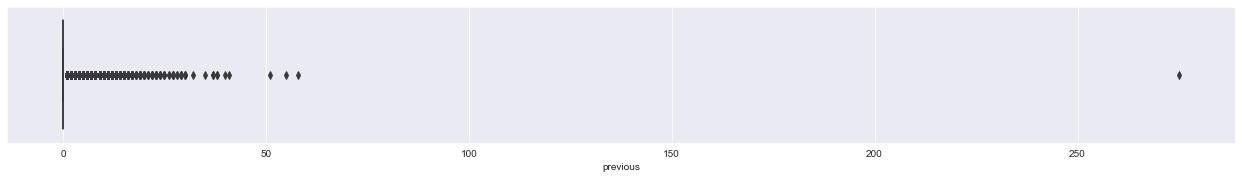

In [10]:
#boxplots to display the outliers

for i in edata.columns:
    if edata[i].dtype == 'int64':
        fig,ax = plt.subplots(figsize=(22, 2.5)) 
        sns.boxplot(edata[i], color="y")
        plt.show()
        

## Multivariate Analysis

### Make a function to plot boxplots for all continuous variables VS ‘Target’ variable and countplots for all categorical variables VS ‘Target’ variable?

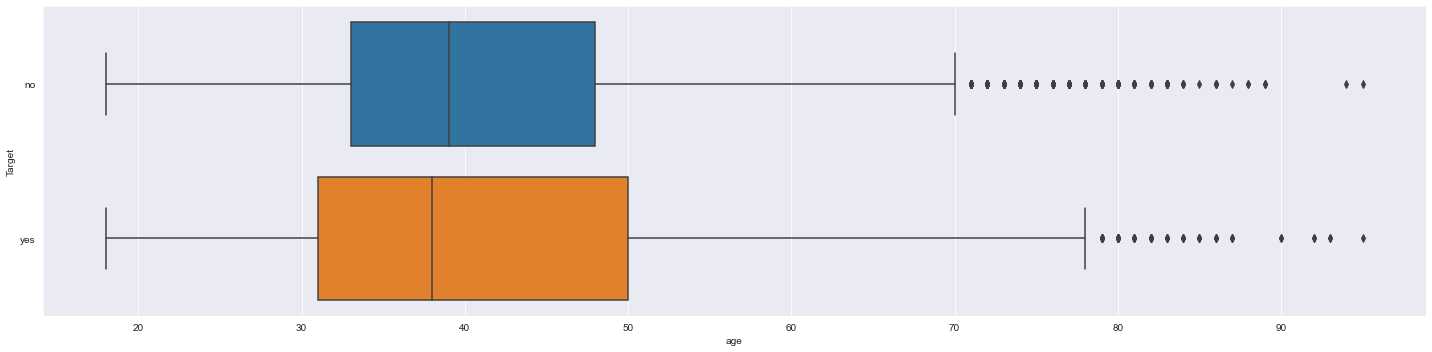

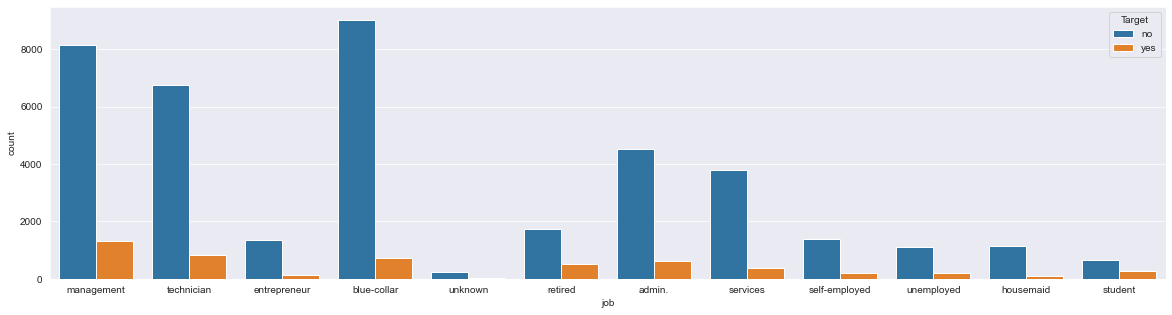

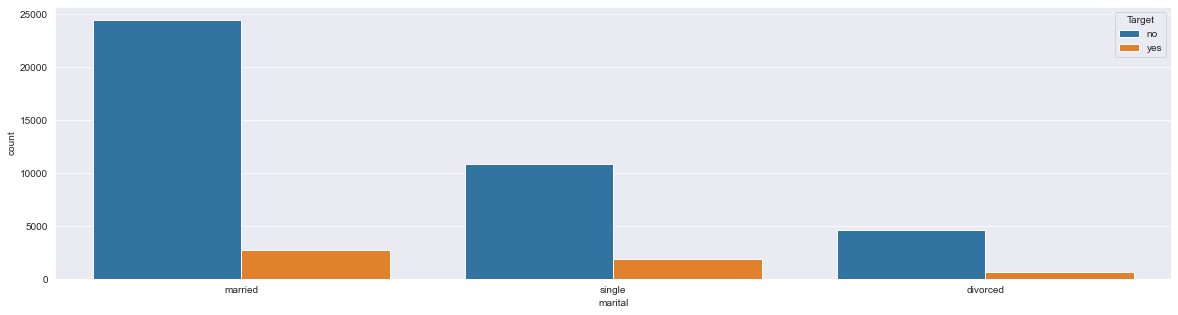

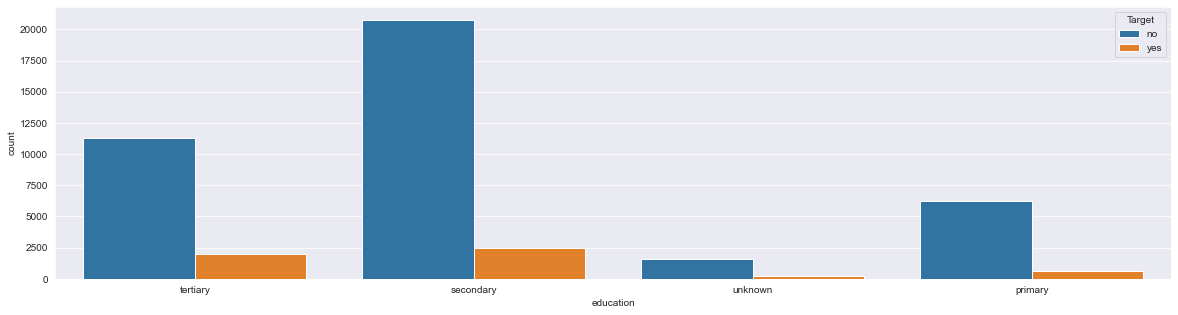

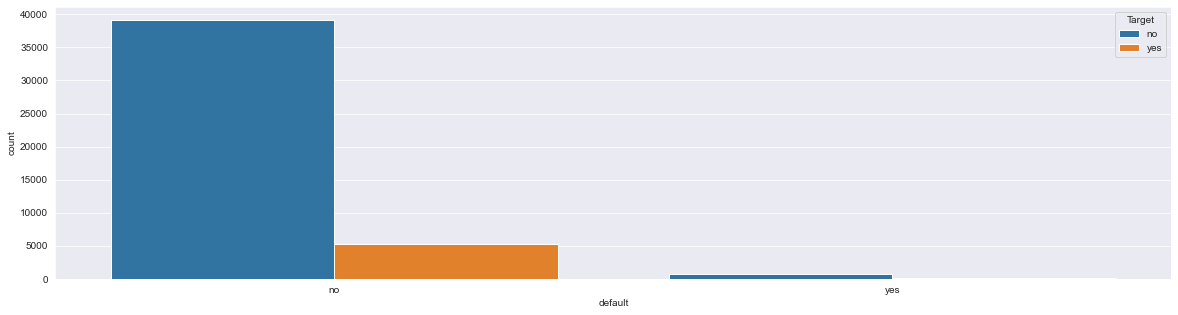

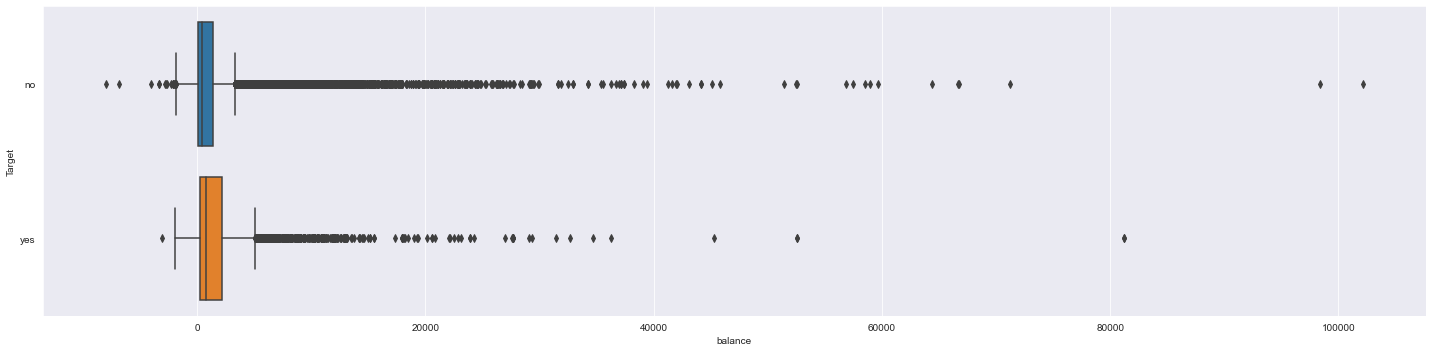

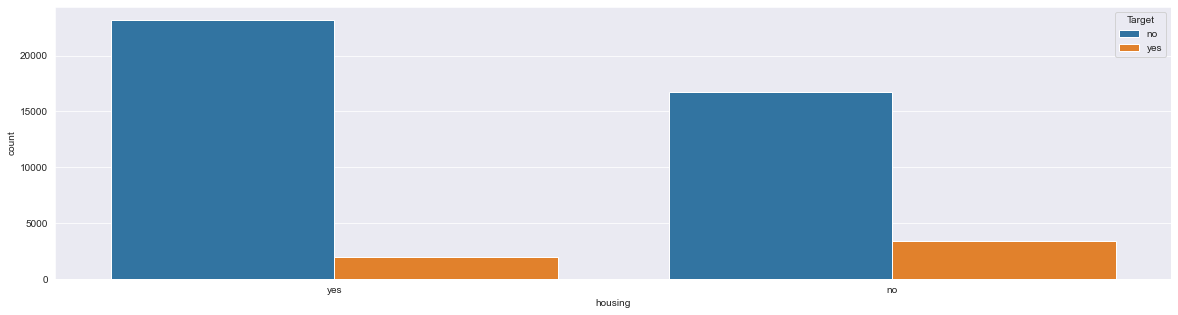

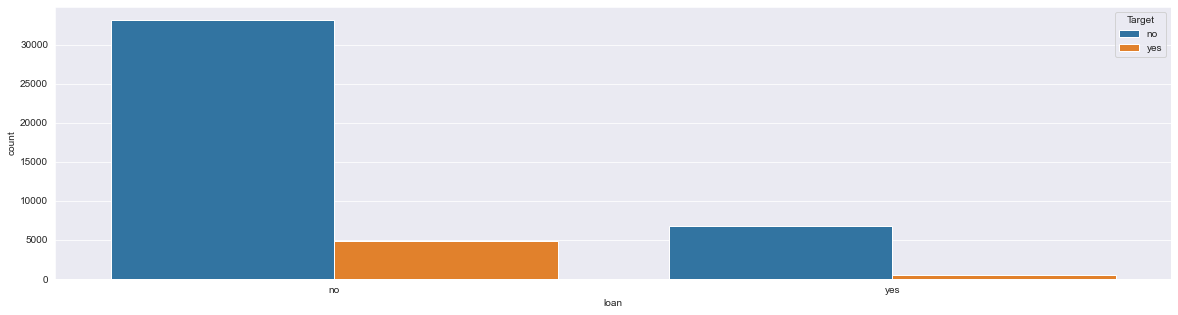

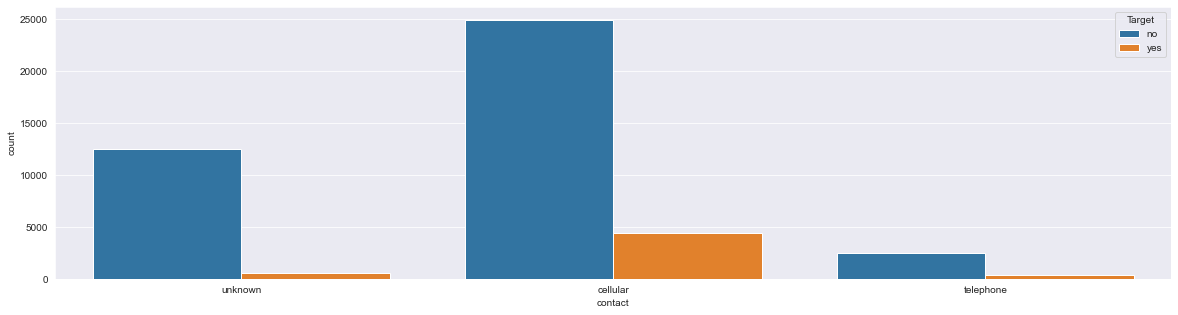

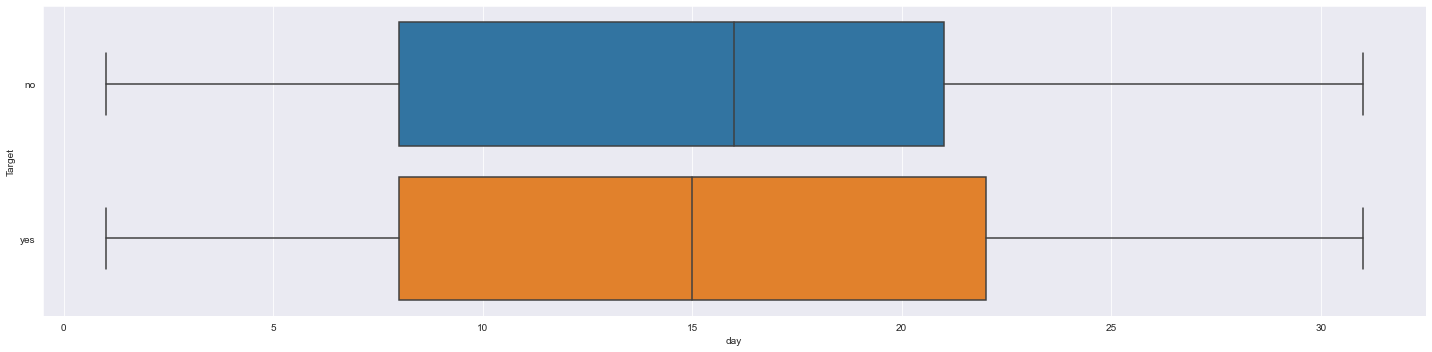

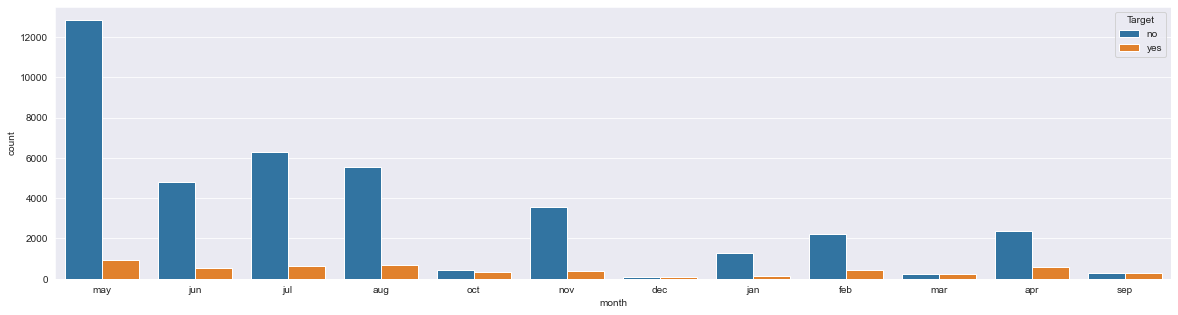

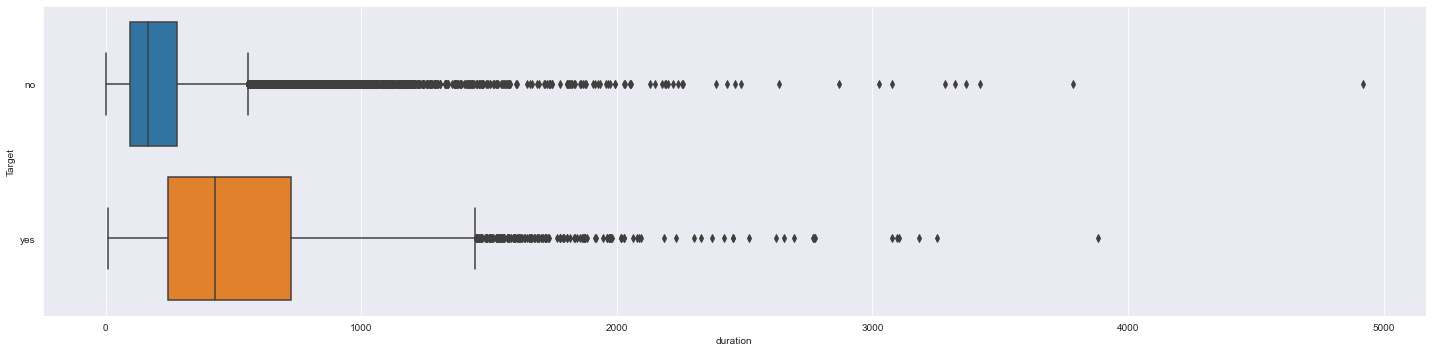

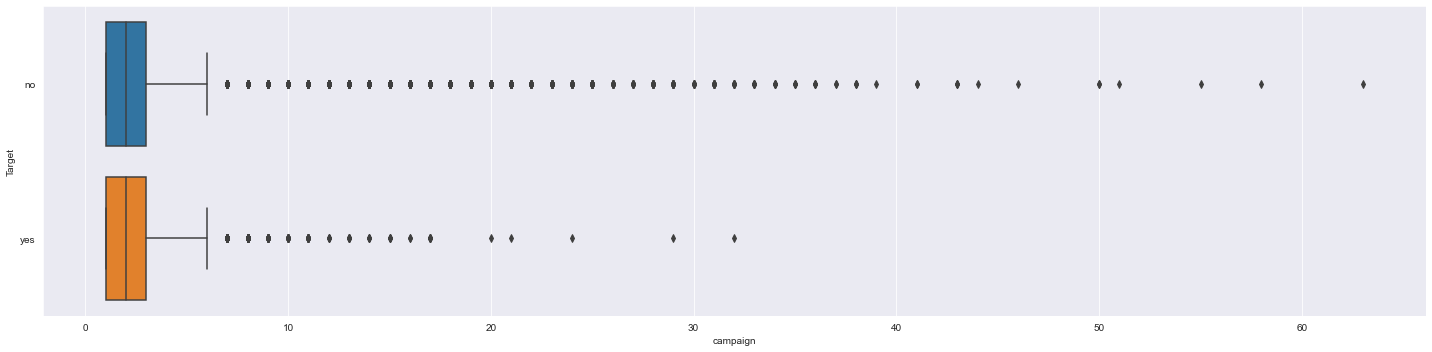

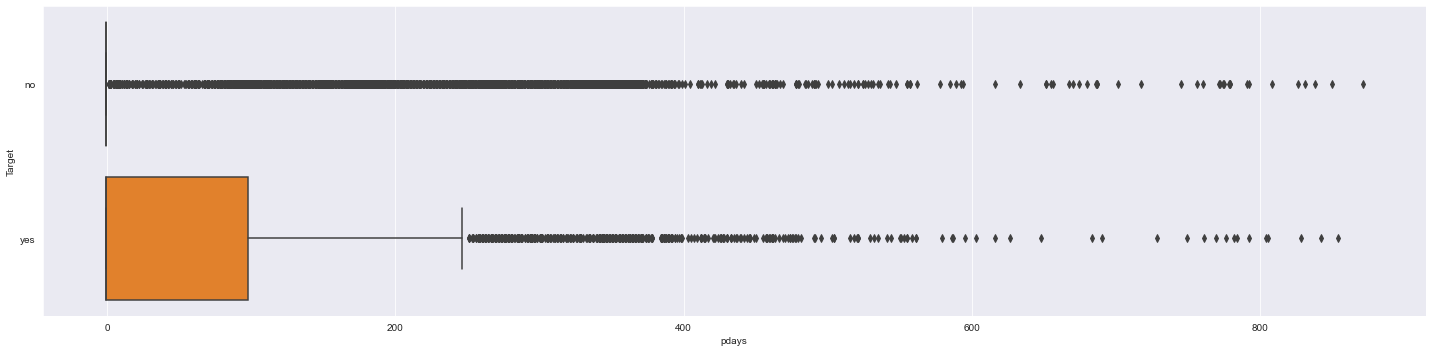

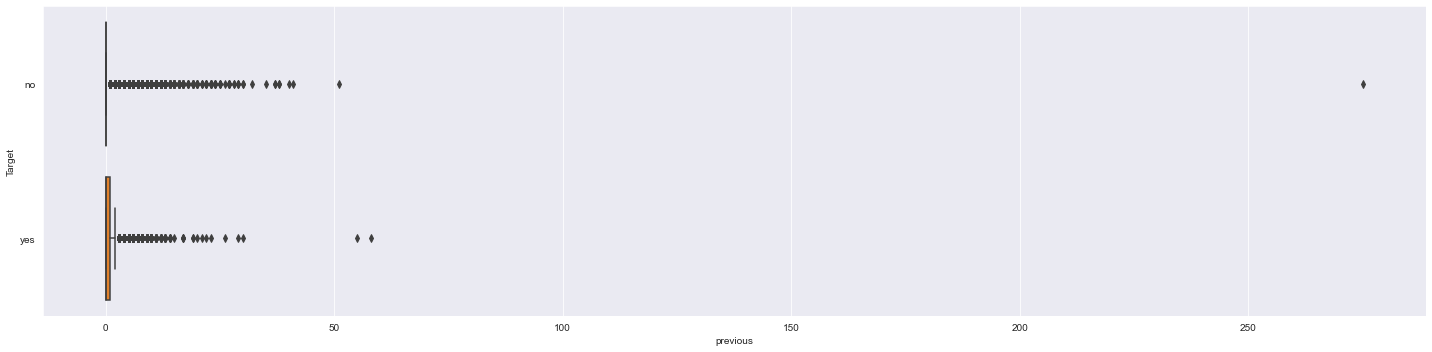

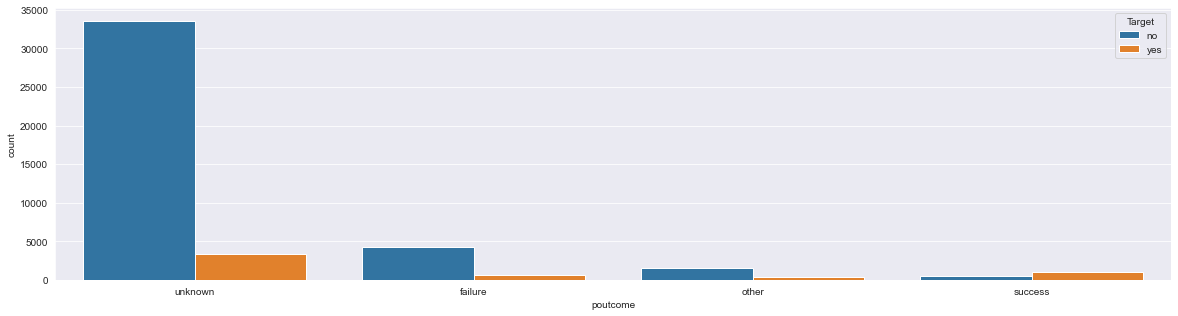

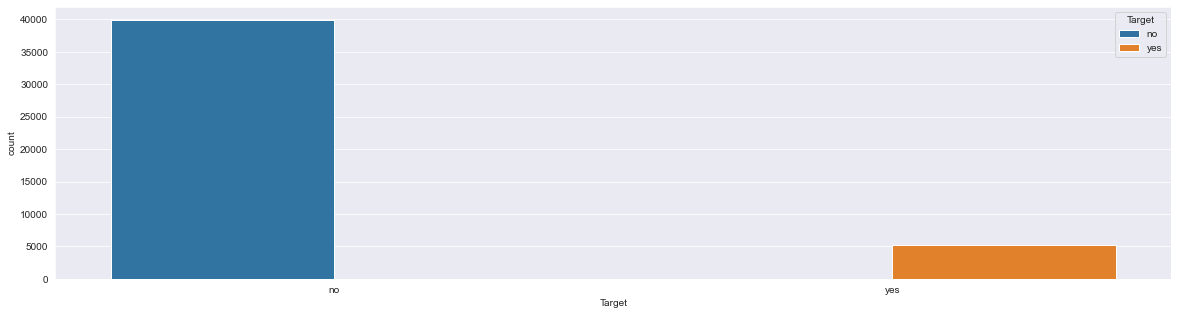

In [11]:
def multivaritate_plot(objDF):

    for i in objDF.columns:
        if objDF[i].dtype =='object':
            fig,ax = plt.subplots(figsize=(20, 5))
            sns.countplot(x=objDF[i], hue=objDF['Target'])
        elif objDF[i].dtype =='int64':
            fig,ax = plt.subplots(figsize=(20, 5))
            sns.boxplot(x=objDF[i], y=objDF['Target'])
            plt.tight_layout()
            plt.show()
multivaritate_plot(edata);

### Bi-variate analysis between predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmaps, histograms or density curves

In [12]:
edata.groupby('Target').mean().transpose()

Target,no,yes
age,40.838986,41.670070
balance,1303.714969,1804.267915
day,15.892290,15.158253
duration,221.182806,537.294574
campaign,2.846350,2.141047
pdays,36.421372,68.702968
previous,0.502154,1.170354


In [13]:
edata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
#from sklearn.preprocessing import LabelEncoder
#le_marital = LabelEncoder();
#le_education = LabelEncoder();
#le_education = LabelEncoder();
#edata['marital'] = le_education.fit_transform(edata['marital'])

### Prepare the data for analytics

### Label encode or create dummy variables for categorical variables. Give reason for selecting either of them

In [15]:
replaceStruct = {
                "marital": {"married": 1, "single": 2 ,"divorced": 3},
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": 4},
                "default": {"yes": 1, "no":0 },
                "housing":{"yes": 1, "no":0 },
                "loan":  {"yes": 1, "no":0 },
                "Target": {"yes": 1, "no":0 },
                "contact": {"cellular": 1, "telephone": 2, "unknown": 3},
                "poutcome": {"failure": 0, "success":1 , "other": 3, "unknown": 4},
                    }
oneHotCols=["job"]

print(replaceStruct)

{'marital': {'married': 1, 'single': 2, 'divorced': 3}, 'education': {'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 4}, 'default': {'yes': 1, 'no': 0}, 'housing': {'yes': 1, 'no': 0}, 'loan': {'yes': 1, 'no': 0}, 'Target': {'yes': 1, 'no': 0}, 'contact': {'cellular': 1, 'telephone': 2, 'unknown': 3}, 'poutcome': {'failure': 0, 'success': 1, 'other': 3, 'unknown': 4}}


In [16]:
edata_r=edata.replace(replaceStruct)
edata_r=pd.get_dummies(edata_r, columns=oneHotCols)
edata_r.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,3,0,2143,1,0,3,5,may,...,0,0,1,0,0,0,0,0,0,0
1,44,2,2,0,29,1,0,3,5,may,...,0,0,0,0,0,0,0,1,0,0
2,33,1,2,0,2,1,1,3,5,may,...,1,0,0,0,0,0,0,0,0,0
3,47,1,4,0,1506,1,0,3,5,may,...,0,0,0,0,0,0,0,0,0,0
4,33,2,4,0,1,0,0,3,5,may,...,0,0,0,0,0,0,0,0,0,1


In [17]:
edata_r=edata_r.drop('month',1)

In [18]:
edata_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   marital            45211 non-null  int64
 2   education          45211 non-null  int64
 3   default            45211 non-null  int64
 4   balance            45211 non-null  int64
 5   housing            45211 non-null  int64
 6   loan               45211 non-null  int64
 7   contact            45211 non-null  int64
 8   day                45211 non-null  int64
 9   duration           45211 non-null  int64
 10  campaign           45211 non-null  int64
 11  pdays              45211 non-null  int64
 12  previous           45211 non-null  int64
 13  poutcome           45211 non-null  int64
 14  Target             45211 non-null  int64
 15  job_admin.         45211 non-null  uint8
 16  job_blue-collar    45211 non-null  uint8
 17  job_entrepre

### Create the training set and test set in a ratio of 70:30. Make sure and verify distribution of classes is the same in the full dataset and train test split data

In [19]:
x=edata_r.drop(['Target','day'],1)
y=edata_r['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [20]:
x_test.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
3610,42,1,1,0,2519,1,0,3,262,4,...,0,0,0,0,0,0,0,0,0,0
11677,37,1,2,0,2209,0,0,3,167,2,...,0,0,0,0,0,0,0,1,0,0
33018,32,1,2,0,923,1,0,1,819,4,...,0,0,0,0,0,0,0,0,0,0
44323,53,1,1,0,306,0,0,1,388,3,...,0,0,0,0,0,0,0,0,0,0
8119,32,2,3,0,257,1,0,3,183,5,...,0,0,0,0,0,0,0,1,0,0


In [21]:
x_train.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
6149,32,1,2,1,-238,1,0,3,427,1,...,0,0,0,0,0,0,0,0,0,0
12403,34,2,2,0,-478,1,1,3,111,4,...,0,0,0,0,0,0,0,0,0,0
21645,32,1,2,0,266,1,0,1,168,2,...,0,0,0,0,0,0,0,1,0,0
29580,36,1,2,1,13,0,1,1,150,4,...,0,0,0,0,0,0,0,0,0,0
31245,23,2,2,0,486,0,0,1,87,1,...,0,0,0,0,0,0,1,0,0,0


## Create the ensemble model

### Build the ensemble models (Bagging and Boosting) and Decision Tree model (at least 4 models in total). Note the model performance by using different metrics. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall

### Decision Tree with Gini Criterion

In [22]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTree.fit(x_train, y_train)

y_predict = dTree.predict(x_test)

In [23]:
print (dTree.score(x_train, y_train))
print (dTree.score(x_test, y_test))

0.9003065061459222
0.897817752875258


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

DTAcc = accuracy_score(y_test, y_predict)
DTPre = precision_score(y_test, y_predict)
DTRec = recall_score(y_test, y_predict)

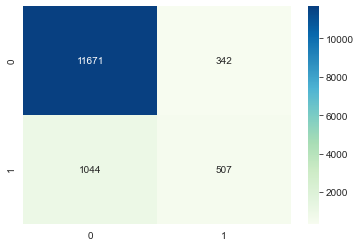

In [25]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot =True, cmap=plt.cm.GnBu, fmt ='d')

In [26]:
results = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': DTAcc, 'Precision': DTPre,'Recall': DTRec })
results = results[['Method', 'Accuracy', 'Precision', 'Recall']]
results

,Method,Accuracy,Precision,Recall
0,Decision Tree,0.897818,0.597173,0.326886


### Decision Tree with Entropy Criteria

In [27]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy',max_depth=5, random_state=1)
dTreeR.fit(x_train, y_train)

y_predict = dTreeR.predict(x_test)

In [28]:
print (dTreeR.score(x_train, y_train))
print (dTreeR.score(x_test, y_test))

0.893828798938288
0.8920672368033029


In [29]:
DTEAcc = accuracy_score(y_test, y_predict)
DTEPre = precision_score(y_test, y_predict)
DTERec = recall_score(y_test, y_predict)
print

<function print>

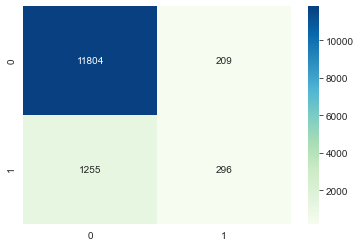

In [30]:
cm1 = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm1, annot =True,fmt='d', cmap=plt.cm.GnBu)

In [31]:
tempresults = pd.DataFrame({'Method':['Decision Tree Entropy'], 'Accuracy': DTEAcc, 'Precision': DTEPre,'Recall': DTERec })
results=pd.concat([results, tempresults])
results = results[['Method', 'Accuracy', 'Precision', 'Recall']]
results

,Method,Accuracy,Precision,Recall
0,Decision Tree,0.897818,0.597173,0.326886
0,Decision Tree Entropy,0.892067,0.586139,0.190845


### Model with Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)

In [33]:
print (bgcl.score(x_train, y_train))
print (bgcl.score(x_test, y_test))

0.9037823490378235
0.901061633736361


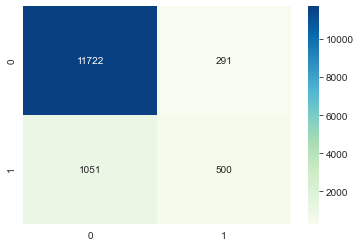

In [34]:
cm2= metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm2, annot =True,fmt='d', cmap=plt.cm.GnBu)

### ADA Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)

In [36]:
print (abcl.score(x_train, y_train))
print (abcl.score(x_test, y_test))

0.8903529560463868
0.8880861102919493


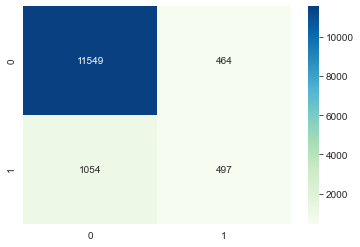

In [37]:
cm3= metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm3, annot =True,fmt='d', cmap=plt.cm.GnBu)

### Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)

In [39]:
print (gbcl.score(x_train,y_train))
print(gbcl.score(x_test,y_test))

0.904603911903182
0.9002506635210852


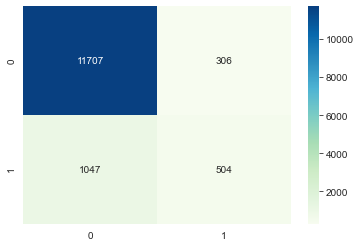

In [40]:
cm4=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm4, annot =True,fmt='d', cmap=plt.cm.GnBu)

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 1, random_state=1, max_features=15)
rfcl = rfcl.fit(x_train, y_train)
y_predict = rfcl.predict(x_test)

In [42]:
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.9503270452175562
0.8608817457976998


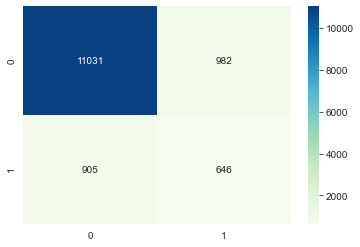

In [43]:
cm5=metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm5, fmt='d', cmap=plt.cm.GnBu, annot = True)